In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import json
import pickle
import mmcv
import utils
import numpy as np
import pandas as pd
import evaluation
import detection
import datasets
import visualization

In [2]:
name = "cascade_rcnn_r50"
filename = "eval_result.pkl"
cfg = './cfg/cascade_rcnn_10164.py'
chp = '../work_dirs/cascade_rcnn_r50/epoch_12.pth'
log_path = "../work_dirs/cascade_rcnn_r50/20190427_093610.log"
#output = '../detection/cm_rcnn_10164_cos/eval_result.json'
root = '../detection/cascade_rcnn_r50'


load_type = "test"
coco_types = ["bbox"]
voc_types = "bbox"
thresh = [0.5, 0.75]

In [3]:
coco_dataset, concrete = datasets.load_dataset(cfg, load_type)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Preparing dataset ......
[Dataset is ready now !]


In [4]:
data, _, _, _ = evaluation.detect_and_coco_eval(cfg, chp, filename, eval_type=coco_types,
                                                name=name, params=None)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 9.5 task/s, elapsed: 29s, ETA:     0scascade_rcnn_r50 detection datasets done!

Writing detected results to ../detection/cascade_rcnn_r50/eval_result.pkl
......
Writing done to pkl file: ../detection/cascade_rcnn_r50/eval_result.pkl

Writing formatted results to ../detection/cascade_rcnn_r50/eval_result.json
......
Writing done to json file: ../detection/cascade_rcnn_r50/eval_result.json

Starting evaluate bbox ......
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.770
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.959
 Average Precision  (AP) @[ IoU=0.75      | area=   all | max

In [5]:
gt, gt_num, det, det_num, class_id = evaluation.voc_ap_prepare(coco_dataset, image_ids=None,
                                                               class_names=None,
                                                               limit=None, types=voc_types, save=True)
targets = utils.voc_ap_compute(coco_dataset, class_id, gt, det, load=False,
                               class_names=None, types=voc_types, threshold=thresh)

Ready to formatting on *bbox* ...
[Building voc style GTS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 78.2 task/s, elapsed: 4s, ETA:     0s
voc groundtruth file building done!
Gt(gt numbers: [289])file saved done in ../detection/cascade_rcnn_r50/bbox_gts.pkl

[Building voc style DETS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 305/305, 2224.8 task/s, elapsed: 0s, ETA:     0s
voc detection file building done!
Det(det numbers: [305])file saved done in ../detection/cascade_rcnn_r50/bbox_dets.pkl
Ready to evaluate on *bbox* ...

TP: (2, 305)
FP: (2, 305)
FPR: (2, 305)
TPR: (2, 305)
AREA: [0.97757143 0.89779219] (2,)
AP [0.96693113 0.85418761] (2,)
voc formatted file save done![../detection/cascade_rcnn_r50/voc_bbox_0.5_0.75.pkl]


(2, 307) <class 'numpy.ndarray'>
(2, 307) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>
(2, 307) <class 'numpy.ndarray'>
(2, 307) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>

Multiple pr lines
Save done![../detection/cascade_rcnn_r50/bbox_pr.png]


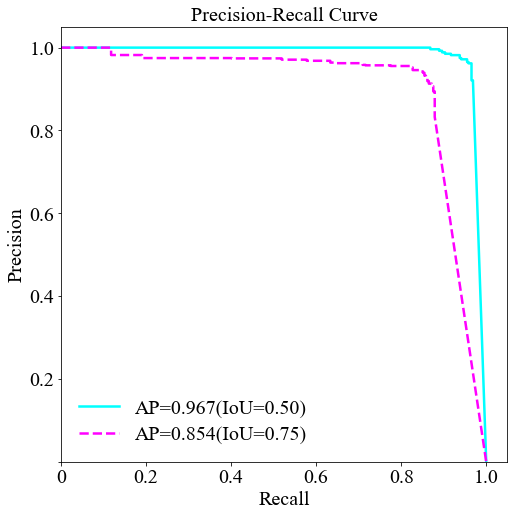


Multiple roc lines
Save done![../detection/cascade_rcnn_r50/bbox_roc.png]


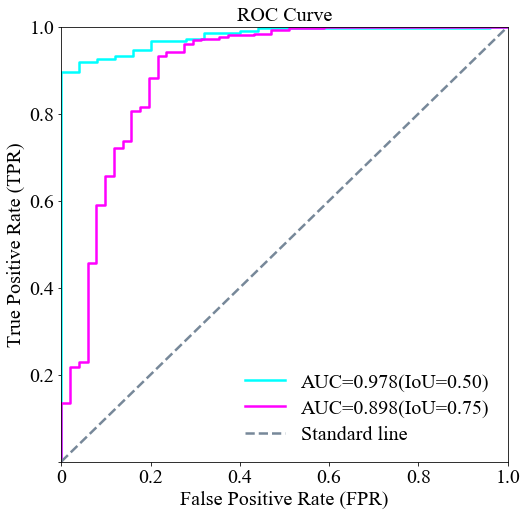

In [6]:
save = True

visualization.plot_voc_curve(targets, "crack", thresh, save=save, name=voc_types, root=root)

In [7]:
training = visualization.read_log(log_path)

 Save done![../detection/cascade_rcnn_r50/learning_curve.png]


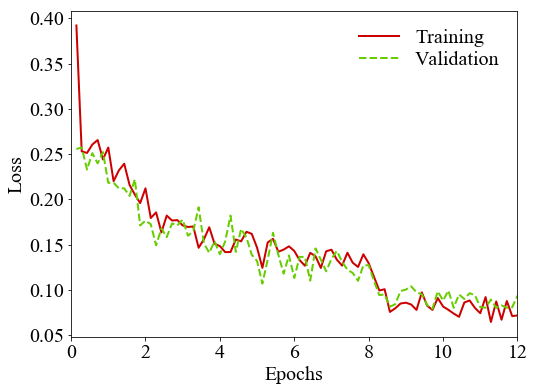

In [8]:
save_1 = True
path_1 = "../detection/cascade_rcnn_r50/learning_curve.png"

visualization.plot_training_curve(training, plot="loss", save=save_1, save_path=path_1)

 Save done![../detection/cascade_rcnn_r50/learing_rate.png]


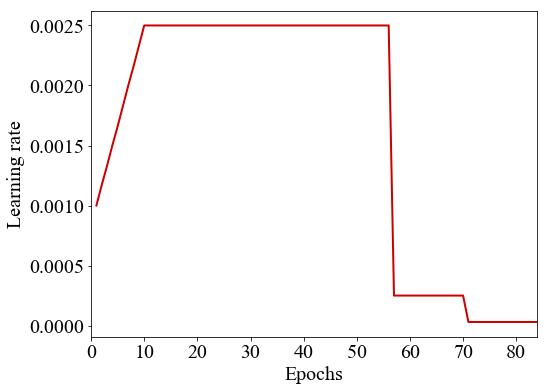

In [9]:
save_2 = True
path_2 = "../detection/cascade_rcnn_r50/learing_rate.png"

visualization.plot_training_curve(training, plot="lr", save=save_2, save_path=path_2)